**Author**: CodeForAll  
**License**: MIT License

---


# Mass-Spring-Damper System: Step Response with Disturbance Analysis

In this experiment, we will analyze the **step response with disturbance** of a mass-spring-damper system. The step response with disturbance shows how the system behaves when a sudden step force is applied (a step input) and an oscillatory disturbance is added. This type of analysis helps in understanding the system's response when subjected to both a constant force and a periodic disturbance.

---

## System Overview

The mass-spring-damper system is governed by the following second-order differential equation:

$$
F(t) = m \cdot \ddot{x}(t) + c \cdot \dot{x}(t) + k \cdot x(t)
$$

Where:
- \( F(t) \) is the applied force (in Newtons, N),
- \( m \) is the mass of the object (in kg),
- \( c \) is the damping coefficient (in Ns/m),
- \( k \) is the spring constant (in N/m),
- \( x(t) \) is the displacement of the mass from its equilibrium position (in meters).

---

## Transfer Function

The system can be modeled using the transfer function \( G(s) \), which relates the input force to the displacement of the mass. The transfer function in the Laplace domain is given by:

$$
G(s) = \frac{X(s)}{F(s)} = \frac{1}{m \cdot s^2 + c \cdot s + k}
$$

Where:
- \( X(s) \) is the Laplace transform of the displacement \( x(t) \),
- \( F(s) \) is the Laplace transform of the combined input force \( F(t) \), which is the sum of a step input and a disturbance.

---

## Experiment Setup

We will use the following parameters for the system:
- Mass, \( m = 1 kg \),
- Spring constant, \( k = 2 N/m \),
- Time vector from 0 to 10 seconds, with 500 points.

The **step input** is a constant force applied at time \( t = 0 \), and the **disturbance** is a sinusoidal force added to the system.

---

## Disturbance Function

The disturbance in this experiment is modeled as a sinusoidal function, which is applied in addition to the step input. The disturbance has the form:

$$
d(t) = A \sin(\omega t)
$$

Where:
- \( A \) is the amplitude of the disturbance,
- \( \omega \) is the frequency of the disturbance.

---

## Experiment Process

In this experiment, we simulate the system's response to the combined effects of:
1. **A step input** force,
2. **A sinusoidal disturbance** force.

We analyze how the system behaves when both forces act simultaneously, with varying damping coefficients:
- \( c = 0.5 \) Ns/m (lower damping),
- \( c = 1.0 \) Ns/m (medium damping),
- \( c = 3.0 \) Ns/m (higher damping).

For each damping value, we simulate and plot the system's displacement over time under the combined effects of the step input and disturbance.

---




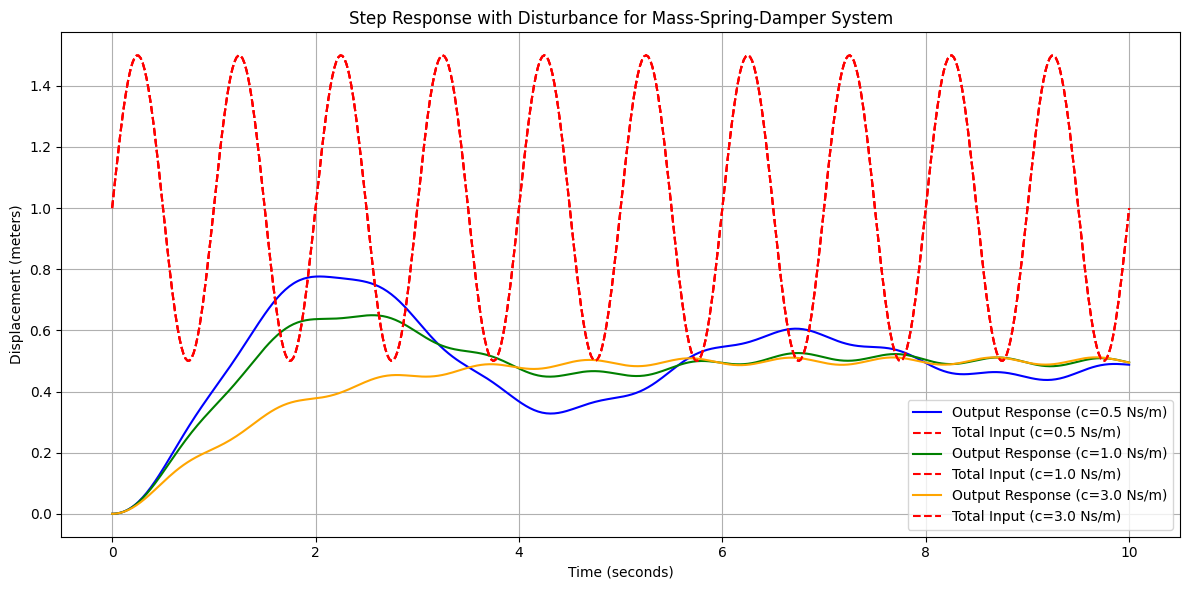

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# System parameters
m = 1  # mass (kg)
k = 2  # spring constant (N/m)
damping_values = [0.5, 1.0, 3.0]  # Different damping coefficients
time = np.linspace(0, 10, 500)  # Time vector (from 0 to 10 seconds, 500 points)

# Step input function
def step_input(t):
    return np.ones_like(t)  # Step input: r(t) = 1 for t > 0

# Disturbance function (sinusoidal disturbance)
def disturbance(t):
    return 0.5 * np.sin(2 * np.pi * 1 * t)  # Sinusoidal disturbance with frequency 1 Hz

# Define colors for different damping values
colors = ['blue', 'green', 'orange']

# Plotting the response for different damping values
plt.figure(figsize=(12, 6))

# Loop through each damping coefficient
for i, c in enumerate(damping_values):
    # Create transfer function for each damping value
    system = ctrl.TransferFunction([1], [m, c, k])

    # Total input: step input + disturbance
    total_input = step_input(time) + disturbance(time)

    # Simulate the response to the total input
    time_response, response = ctrl.forced_response(system, T=time, U=total_input)

    # Plotting the system response (output)
    plt.plot(time_response, response, label=f'Output Response (c={c} Ns/m)', color=colors[i])

    # Plotting the input (step + disturbance)
    plt.plot(time, total_input, label=f'Total Input (c={c} Ns/m)', linestyle='--', color='red')

# Plotting the time-domain response
plt.title('Step Response with Disturbance for Mass-Spring-Damper System')
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement (meters)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Expected Observations

- The **step input** provides an immediate force, and the system will respond by gradually moving to a new equilibrium position.
- The **disturbance** will superimpose oscillations on top of the system's response, depending on the damping.
- For **lower damping** ( \( c = 0.5 \) Ns/m), we might see more oscillations before the system stabilizes.
- For **medium damping** ( \( c = 1.0 \) Ns/m), the system will stabilize more quickly, with fewer oscillations.
- For **higher damping** ( \( c = 3.0 \) Ns/m), the system will stabilize even more quickly, with minimal oscillations, and the disturbance will still affect the system’s movement.

---

## Conclusion

This experiment demonstrates how the **step input** and **oscillatory disturbance** interact with the dynamics of a mass-spring-damper system under various damping conditions. The analysis provides insight into how disturbances can affect system behavior, especially when combined with a step input, which is common in real-world mechanical systems subject to both steady and oscillatory forces.